# Predicción de la reserva mensual del embalse Tranco de Beas (cedex)

Los modelos a aplicar van a ser el suavizado exponencia y un modelo ARIMA.

# 1 - Lectura de datos, creación de la serie y análisis básico.

Los datos sobre los que se va a realizar el análisis corresponden al histórico reserva mensual de agua en $hm^3$ en el embalse de "Tranco de Beas" en la provincia de Jaén. Estos datos han sido recogidos de la web de Anuario de Aforos de España 2016-2017 (https://ceh.cedex.es/anuarioaforos/default.asp). Este anuario es mantenido y actualizado anualmente por el CEDEX (Centro de Estudios y Experimentación de Obras Públicas) dependiente del Ministerio para la Transición Ecológica y el Reto Demográfico.

La web descargas es para la red de aforos de la Cuenca del Guadalquivir es:  https://ceh.cedex.es/anuarioaforos/GUADALQUIVIR_csv.asp

In [7]:
archivo <- 'data/embalses_resmen.csv'

# Cargamos el archivo de datos
library(readr)
datos <- read_delim("data/embalses_resmen.csv", ";",
                   escape_double = FALSE,
                   col_types = cols(salmes = col_double(), 
                   entmes = col_double()),
                   locale = locale(decimal_mark = ","), 
                   trim_ws = TRUE)

#El código identificador del embalse "Tranco de Beas" es "ref_ceh" = 5001
datos5001 <- subset(datos, ref_ceh == 5001)
head(datos5001)
tail(datos5001)
summary(datos5001)

ref_ceh,anomes,resmes,salmes,entmes,tipo_dato_id,orig_dato_id
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5001,194410,0.00,9.97,3.32,2,3
5001,194411,0.00,6.07,6.07,2,3
5001,194412,6.27,2.64,8.92,2,3
5001,194501,22.37,1.54,17.64,2,3
5001,194502,37.26,4.83,19.72,2,3
5001,194503,42.23,6.06,11.03,2,3


ref_ceh,anomes,resmes,salmes,entmes,tipo_dato_id,orig_dato_id
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5001,201804,284.247,0.891,49.327,2,1
5001,201805,332.683,1.560,14.482,2,1
5001,201806,345.605,19.349,11.056,2,1
5001,201807,337.312,29.794,5.089,2,1
5001,201808,312.607,30.168,4.485,2,1
5001,201809,286.924,18.388,4.713,2,1


    ref_ceh         anomes           resmes          salmes        
 Min.   :5001   Min.   :194410   Min.   :  0.0   Min.   :  0.0000  
 1st Qu.:5001   1st Qu.:196304   1st Qu.:139.7   1st Qu.:  0.5025  
 Median :5001   Median :198110   Median :273.1   Median :  7.9865  
 Mean   :5001   Mean   :198132   Mean   :260.5   Mean   : 16.4404  
 3rd Qu.:5001   3rd Qu.:200003   3rd Qu.:381.5   3rd Qu.: 26.8525  
 Max.   :5001   Max.   :201809   Max.   :500.0   Max.   :130.7040  
                                                                   
     entmes         tipo_dato_id   orig_dato_id  
 Min.   :  0.000   Min.   :1.00   Min.   :1.000  
 1st Qu.:  3.614   1st Qu.:1.00   1st Qu.:1.000  
 Median :  7.386   Median :1.00   Median :1.000  
 Mean   : 16.774   Mean   :1.23   Mean   :1.378  
 3rd Qu.: 18.139   3rd Qu.:1.00   3rd Qu.:1.000  
 Max.   :204.090   Max.   :2.00   Max.   :3.000  
 NA's   :8                                       

* El archivo de datos contiene las series de datos de reserva de los embalses catalogados en el anuario de aforos 2017-2018. 

* La columna que tiene los datos es "resmen". 

* Como se ve, las mediciones comienzan en octubre de 1944 y termina en septiembre de 2018. A nivel informativo, comentar que las mediciones anuales en hidrología siguen el año hidrologico, que en España va del mes de octubre al mes de septiembre del año siguiente.

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2004,333.394,344.658,359.198,385.229,424.314,423.021,386.739,353.782,339.404,332.580,332.445,328.132
2005,322.785,318.289,313.813,300.446,276.425,256.586,231.245,197.348,188.646,182.410,181.722,188.999
2006,191.727,198.188,228.165,237.768,225.504,198.909,164.143,130.518,117.920,116.643,120.533,124.482
2007,127.749,147.327,158.029,181.476,201.649,186.925,158.502,132.095,124.805,125.963,128.043,129.833
2008,135.040,137.433,139.758,164.653,196.566,186.307,154.915,127.491,119.821,121.518,130.391,164.975
2009,228.093,279.564,319.419,337.373,324.405,275.896,220.773,167.651,157.869,156.981,159.856,213.004
2010,300.383,385.787,426.699,436.684,452.357,447.396,430.108,405.726,388.133,380.124,403.801,424.736
2011,410.999,434.621,426.781,440.333,454.451,440.160,415.409,389.981,376.937,372.267,378.156,382.671
2012,385.177,385.530,379.079,386.891,381.770,356.911,312.642,272.409,250.909,253.124,287.706,314.527
2013,396.048,438.074,483.438,463.106,473.368,465.526,442.900,419.959,397.745,381.770,375.662,380.871


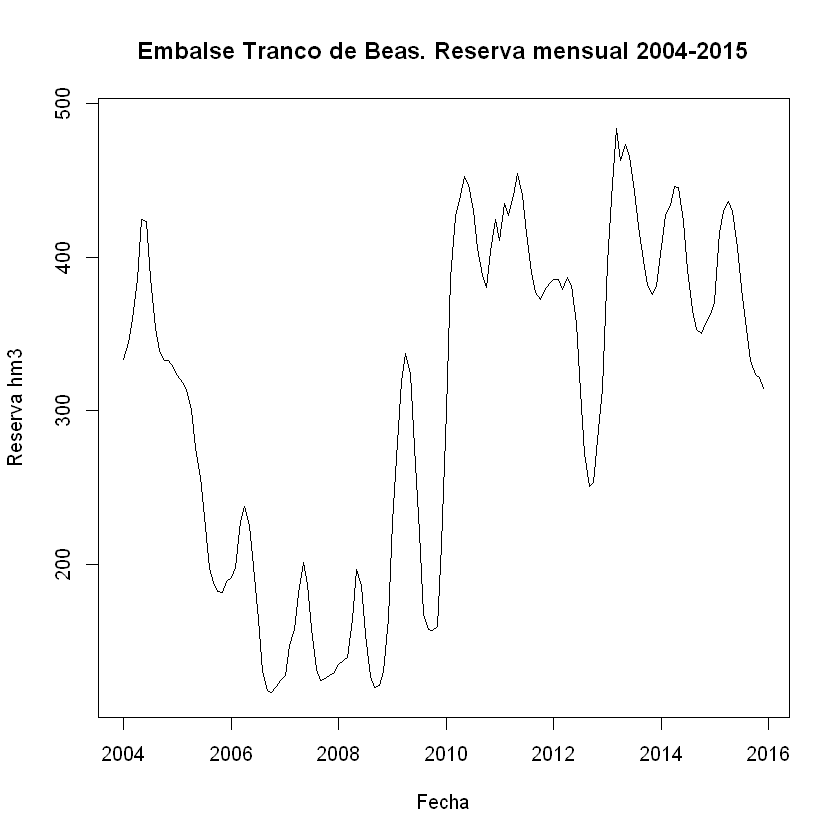

In [9]:
# Cogemos la columna de datos que nos interesa
reserva <- datos5001$resmes

#cremos la serie temporal
reservats <- ts(reserva, start = c(1944,10), freq = 12)

# Cogemos 12 años de datos como se indica en el enunciado.
# pero tomamos un año adicional de forma separada para evaluar posteriormente
# el ajuste de los modelos

# Serie para generar los modelos
rests <- window(reservats, c(2004,1),c(2015,12))
rests

# Serie para evaluar el ajuste 
rests.check <- window(reservats, c(2016,1),c(2016,12))

#hacemos un plot de la serie
plot(rests,
     main = "Embalse Tranco de Beas. Reserva mensual 2004-2015",
     xlab = "Fecha",
     ylab = "Reserva hm3",
     ylim = c(0.99*min(rests), 1.01*max(rests)))

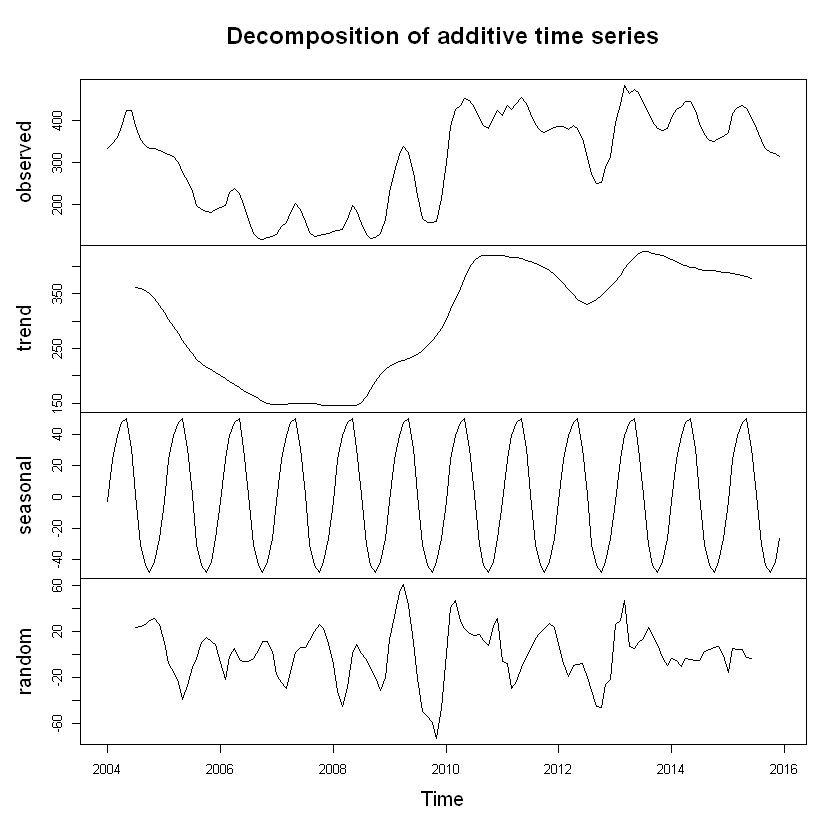

In [10]:
# Vemos la descompsición de la serie
rests.decomp <- decompose(rests)
plot(rests.decomp)

Comprobamos que tiene un ciclo anual bastante marcado

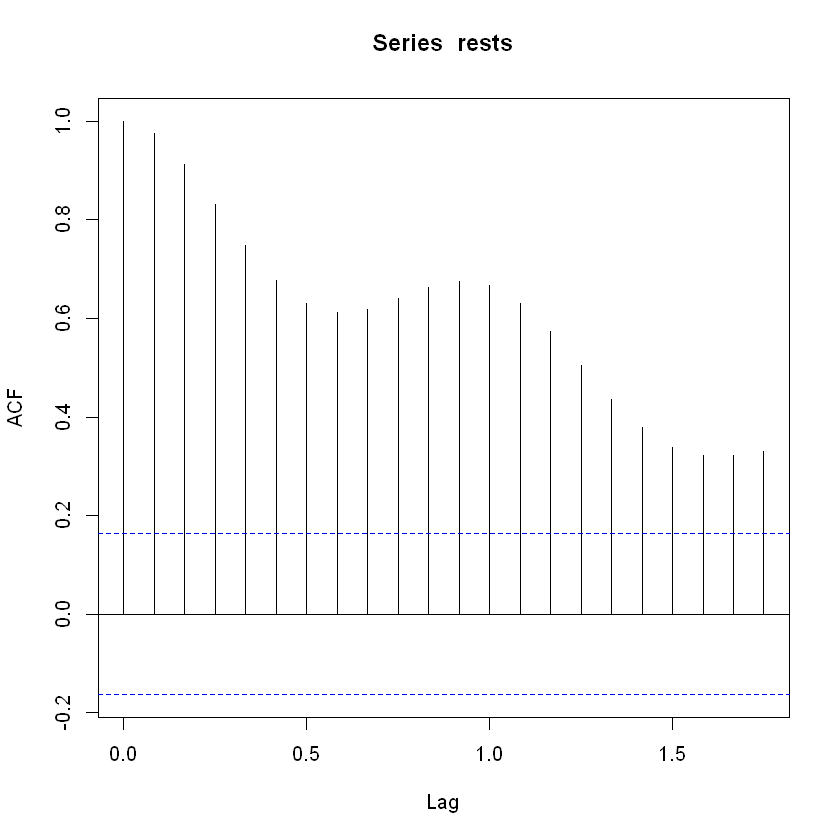

In [11]:
# Vemos si existe autocorrelaciones en los datos
acf(rests)

Se observa que existe una correlación marcada en los datos. La función de autocorrelación disminuye con el lag pero no termina por converger a cero. Por tanto la serie no es estacionaria.

Los lags en el eje x de la gráfica se refieren a unidades relativas de tiempo no a número de observaciones. En este caso los datos son mensuales por lo que, como se observa, en un año habrá 12 mediciones. A efectos esto se traduce en que el los lags están expresados en años.

# 2 - Análisis mediante suavizado exponencial

https://en.wikipedia.org/wiki/Exponential_smoothing

En el siguiente ejemplo se aplica el método de Holt-Winters que consiste concretamente en un triple alisado exponencial:

* Primer alisado: Incluye el efecto del dato previo de la serie.
* Segundo aliasado: Incluye el efecto de la tendencia de serie.
* Tercer alisado: Incluye el efecto de la estacionalidad de la serie.

Esto deriva en que es necesario, al aplicar este método, determinar tres parámetros a partir de los datos de la series (alfa, beta y gamma)

In [12]:
# Se aplica el alisado exponencial de HoltWinters
(rests.hw <- HoltWinters(rests))

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = rests)

Smoothing parameters:
 alpha: 0.9309817
 beta : 0.05661054
 gamma: 1

Coefficients:
          [,1]
a   316.226782
b    -3.769694
s1   13.500853
s2   25.349488
s3   27.457781
s4   25.869172
s5   17.601328
s6   -3.956172
s7   -9.880725
s8  -20.903415
s9  -25.946044
s10 -24.569262
s11 -13.951446
s12  -1.490782

In [13]:
# Vemos algunos de los valores ajustados.
head(rests.hw$fitted)

xhat,level,trend,season
378.1084,386.3474,-10.70391,2.4649097
321.4847,324.1384,-13.61964,10.9659097
313.0452,307.5437,-13.78806,19.2895764
299.1841,294.4704,-13.74759,18.4612431
275.1940,281.8977,-13.68109,6.9774514
254.9622,269.3626,-13.61621,-0.7842153


In [14]:
# Suma total del error cuadratico
rests.hw$SSE

[1] 78779.19

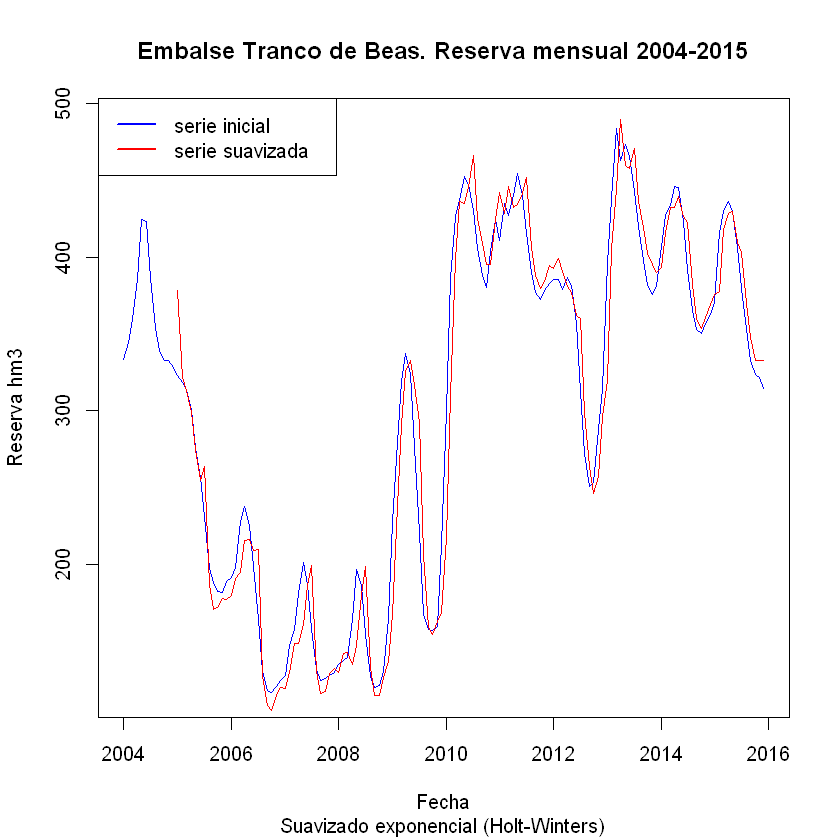

In [23]:
# Grafica serie inicial vs serie suavizada
plot(rests,
     xlab = "Fecha",
     ylab = "Reserva hm3",
     ylim = c(0.99*min(rests), 1.01*max(rests)),
     col = 'blue')
lines(rests.hw$fitted[,1], col="red")
legend("topleft",
       legend=c("serie inicial","serie suavizada"),
       col=c("blue","red"),lwd=2)
title(main = 'Embalse Tranco de Beas. Reserva mensual 2004-2015',
      sub = 'Suavizado exponencial (Holt-Winters)')

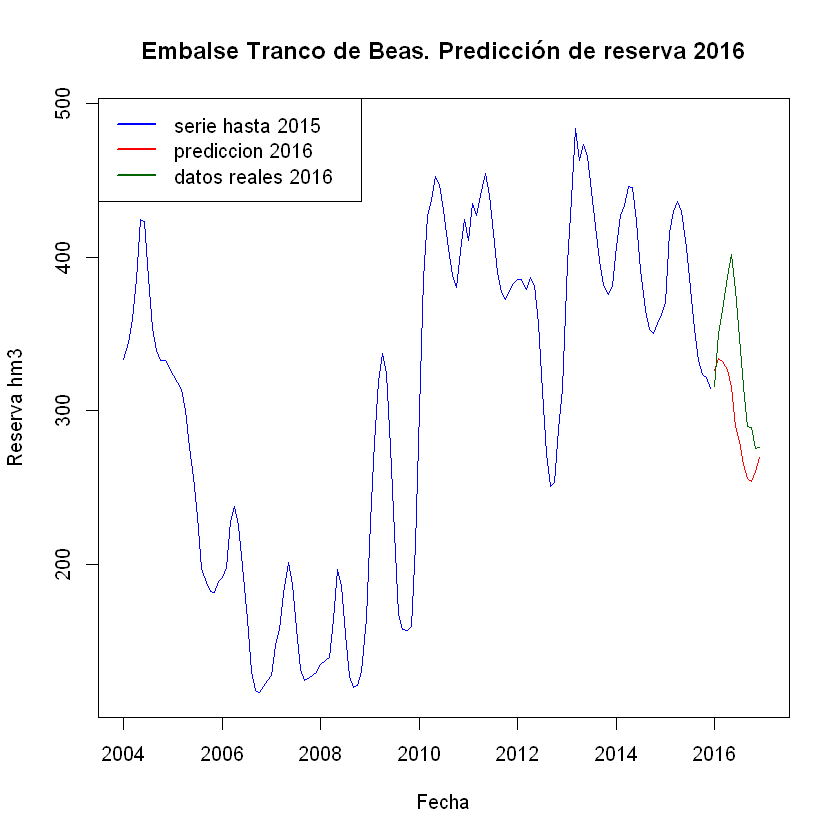

In [24]:
#predicción para 2016
rests.pred2016 <- predict(rests.hw, n.ahead=12)

plot(rests,
     xlim = c(2004, 2017),
     ylim = c(0.99*min(rests), 1.01*max(rests)),
     main = "Embalse Tranco de Beas. Predicción de reserva 2016",
     xlab = "Fecha",
     ylab = "Reserva hm3",
     col = 'blue')
lines(rests.pred2016, col = 'red')
lines(rests.check, col = 'dark green')
legend("topleft",
       legend=c("serie hasta 2015","prediccion 2016",'datos reales 2016'),
       col=c("blue","red",'dark green'),lwd=2)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
Jan 2016       325.9579 294.5569 357.3590 277.93415 373.9817
Feb 2016       334.0369 289.9898 378.0839 266.67273 401.4010
Mar 2016       332.3755 277.6102 387.1408 248.61922 416.1317
Apr 2016       327.0172 262.4511 391.5833 228.27183 425.7625
May 2016       314.9796 241.1267 388.8326 202.03125 427.9280
Jun 2016       289.6524 206.8204 372.4845 162.97172 416.3332
Jul 2016       279.9582 188.3343 371.5820 139.83161 420.0848
Aug 2016       265.1658 164.8609 365.4707 111.76271 418.5689
Sep 2016       256.3535 147.4266 365.2803  89.76425 422.9427
Oct 2016       253.9606 136.4346 371.4866  74.22004 433.7011
Nov 2016       260.8087 134.6799 386.9375  67.91136 453.7060
Dec 2016       269.4997 134.7449 404.2545  63.41001 475.5893

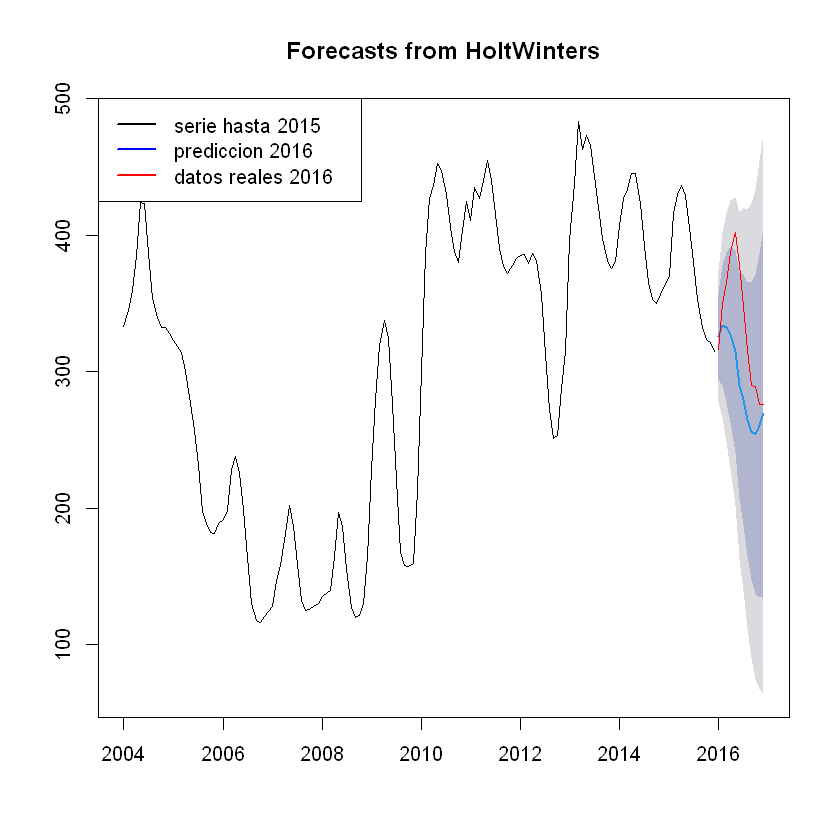

In [17]:
# con la libreria forecast
library(forecast)
(rests.pred2016b <- forecast(rests.hw, h=12))
plot(rests.pred2016b)
lines(rests.check, col = 'red')
legend("topleft",
       legend=c("serie hasta 2015","prediccion 2016",'datos reales 2016'),
       col=c("black","blue",'red'),lwd=2)


Como se observa las predicciones, aunque captan algo del comportmiento histórico de la serie, difieren de forma relevante respecto de los valores reales.

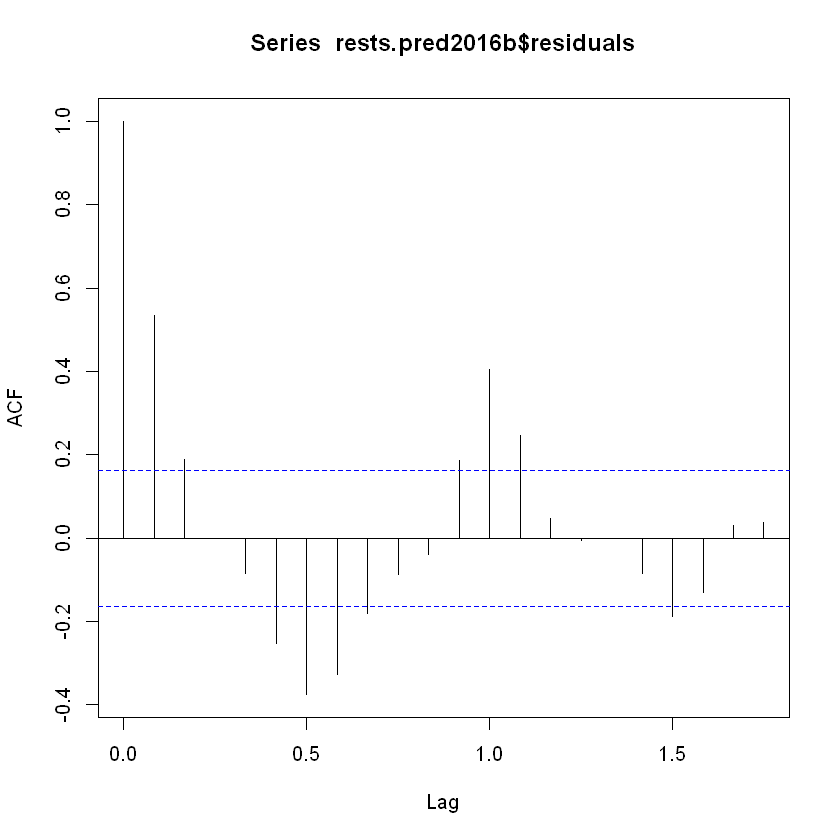

In [18]:
#Función de autocorrelación de los residuos de las predicciones
acf(rests.pred2016b$residuals, na.action = na.pass)

Se observa que la autocorrelación va disminuyendo progresivamente y, aunque con oscilaciones, convergen a cero.

In [25]:
#Error en la predicción de 2016

errors <- data.frame(t(accuracy(rests.pred2016b$mean , rests.check)))

errors$description <- c('Error medio', 
                        'Raíz del error cuadrático medio',
                        'Error medio absoluto',
                        'Porcentaje de error medio',
                        'Porcentaje de error medio absoluto',
                        'Autocorrelación de errores con retraso 1',
                        'Índice U de desigualdad de Theils')
errors

,Test.set,description
,<dbl>,<chr>
ME,40.247500,Error medio
RMSE,50.157171,Raíz del error cuadrático medio
MAE,41.899657,Error medio absoluto
MPE,11.503557,Porcentaje de error medio
MAPE,12.026317,Porcentaje de error medio absoluto
ACF1,0.647911,Autocorrelación de errores con retraso 1
Theil's U,2.195193,Índice U de desigualdad de Theils


# 3 - Análisis mediante un modelo ARIMA

## 3.1 - Determinar si es estacionaria o necesita alguna transformación previa.

Anteriormente en el análisis básico de la serie hemos visto que la serie no era estacionaria. Pero vamos a aplicar el test de la raíz unitaria para confirmarlo

In [26]:
library(tseries)
adf.test(rests)


	Augmented Dickey-Fuller Test

data:  rests
Dickey-Fuller = -2.4094, Lag order = 5, p-value = 0.406
alternative hypothesis: stationary


p-valor > 0.05. Por tanto se desecha la hipoótesis alternativa, que considera que la serie es estacionaria. Por tanto se confirma nuestra primera suposición.

In [27]:
# Vemos si se cumple la condición de homocestaticidad. (Constancia de la varianza)
lambda <- BoxCox.lambda(rests, lower = 0, upper = 2)
lambda

[1] 1.125601

El  valor de lambda es mayor que 1 por tanto es necesario aplicar la transformación de Box-Cox

In [30]:
# Aplicamos la transformación de Box-Cox
rests.BC <- BoxCox(rests, lambda)
rests.BC
BoxCox.lambda(rests.BC, lower = 0, upper = 2)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2004,613.5245,636.9394,667.3062,722.0553,805.1285,802.3643,725.2457,655.9765,626.0056,611.8363,611.5563,602.6201
2005,591.5619,582.2815,573.0587,545.6150,496.6864,456.6753,406.1343,339.6238,322.7706,310.7529,309.4302,323.4524
2006,328.7266,341.2557,400.0373,419.0805,394.7781,342.6570,275.8522,212.9162,189.8320,187.5088,194.5956,201.8194
2007,207.8174,244.1517,264.2769,308.9574,347.9884,319.4489,265.1704,215.8262,202.4115,204.5360,208.3581,211.6536
2008,221.2722,225.7084,230.0278,276.8203,338.1054,318.2570,258.4028,207.3430,193.2963,196.3947,212.6821,277.4316
2009,399.8949,503.0509,584.6124,621.7846,594.9098,495.6147,385.4469,282.5183,263.9747,262.2984,267.7301,370.1784
2010,545.4861,723.2341,810.2298,831.6256,865.3333,854.6476,817.5276,765.4950,728.1925,711.2806,761.4033,806.0308
2011,776.7154,827.1999,810.4052,839.4601,869.8480,839.0885,786.1133,732.1010,704.5633,694.7331,707.1318,716.6541
2012,721.9454,722.6911,709.0773,725.5670,714.7527,662.5194,570.6485,488.5570,445.2960,449.7320,519.6010,574.5288
2013,744.9490,834.6090,932.6094,888.5362,910.7512,893.7695,844.9764,795.8228,748.5471,714.7527,701.8780,712.8561


[1] 1.000076

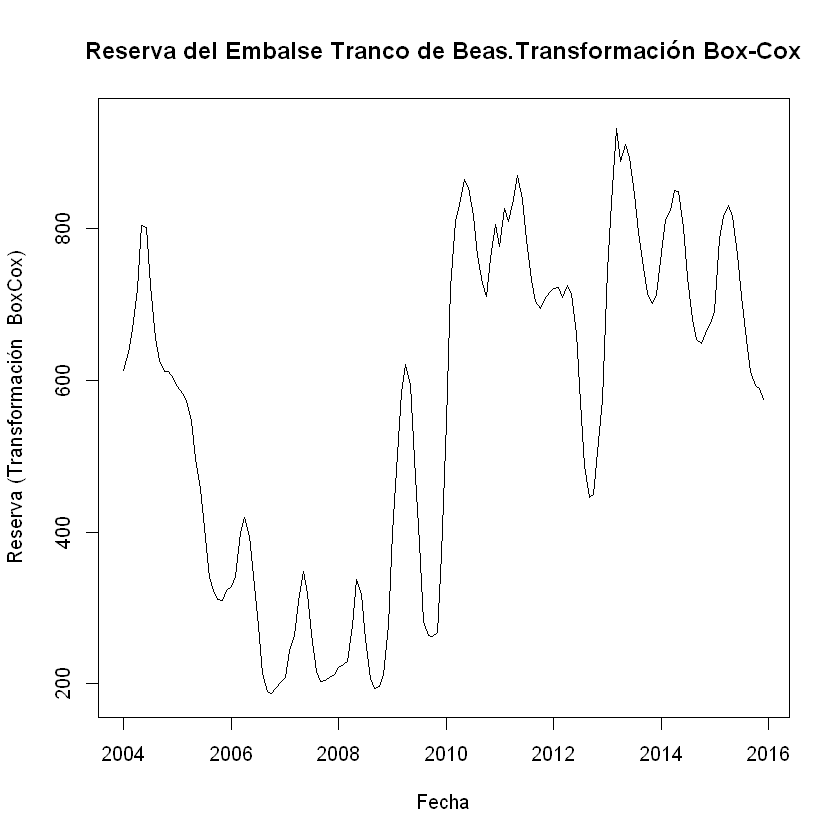

In [29]:
plot(rests.BC,
     main = "Reserva del Embalse Tranco de Beas.Transformación Box-Cox",
     xlab = "Fecha",
     ylab = "Reserva (Transformación  BoxCox)",
     ylim = c(0.99*min(rests.BC), 1.01*max(rests.BC)))

## 3.2 - Contrastar si la serie transformada puede considerarse estacionaria.

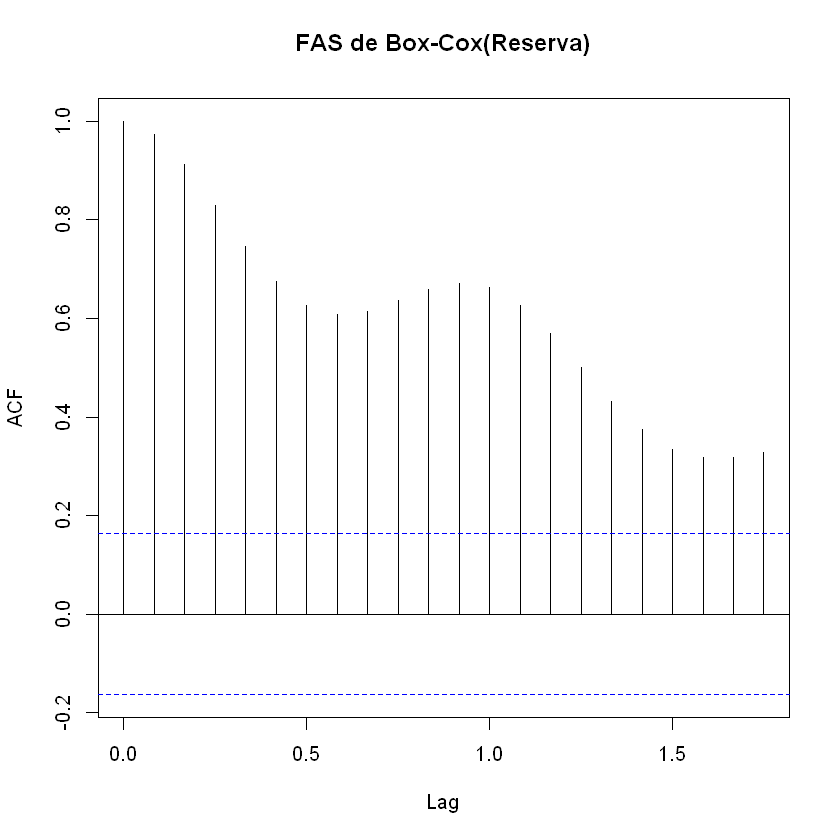

In [31]:
# Estacionariedad en medias
acf(rests.BC, main = "FAS de Box-Cox(Reserva)")

In [32]:
#Probamos el test de raíz unitaria con los datos transformados
adf.test(rests.BC)


	Augmented Dickey-Fuller Test

data:  rests.BC
Dickey-Fuller = -2.4343, Lag order = 5, p-value = 0.3956
alternative hypothesis: stationary


Se observa que la serie sigue sin ser estacionaria.(p-vlue > 0.05)

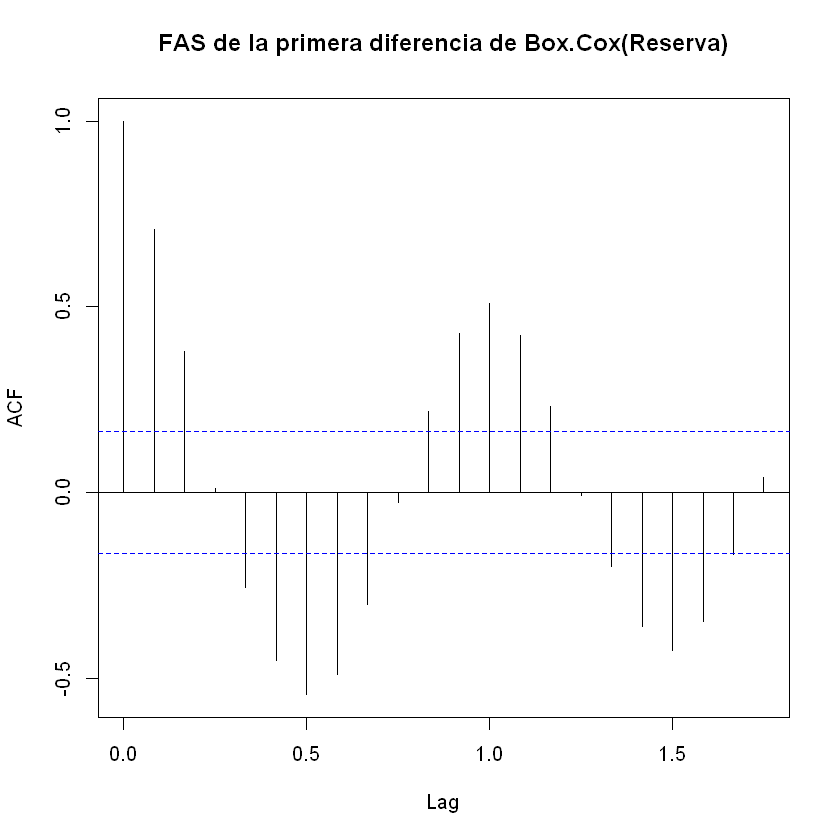

In [33]:
# Probamos con la diferenciación de primer orden
rests.d1 <- diff(rests.BC, lag = 1, differences = 1)
acf(rests.d1, main="FAS de la primera diferencia de Box.Cox(Reserva)")

Hemos visto anteriormente que la serie tiene estacionalidad por tanto este efecto tenemos eliminarlo de la serie de diferencias de orden 1

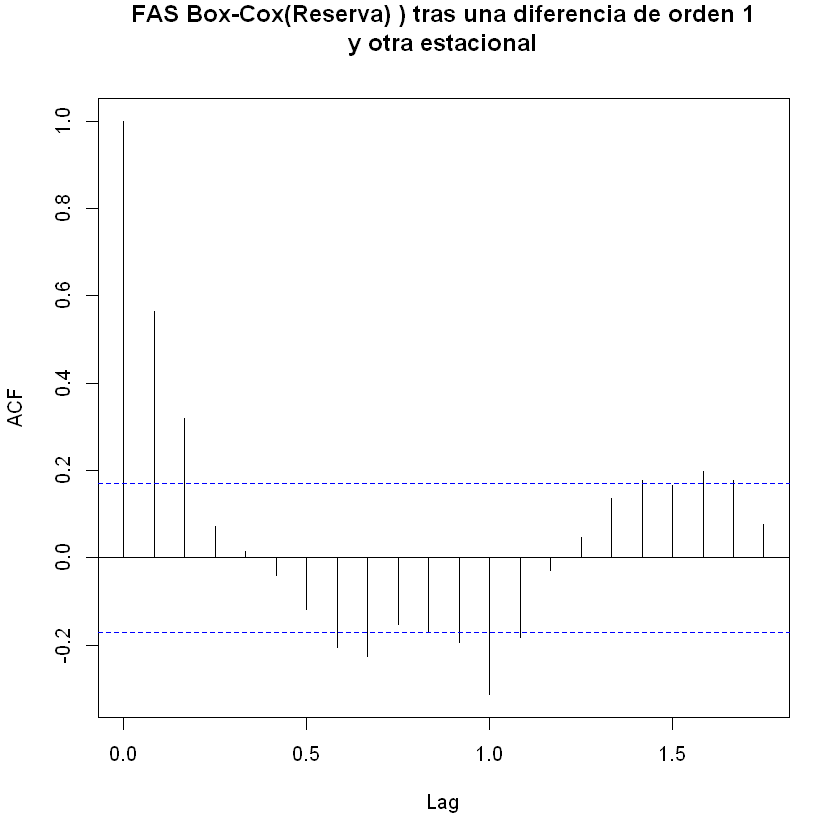

In [34]:
rests.d12 <- diff(rests.d1, lag = 12, differences = 1)
acf(rests.d12, main = "FAS Box-Cox(Reserva) ) tras una diferencia de orden 1
y otra estacional")

Con esto hemos disminuido gran parte de las autocorrelaciones al intervalo (-0.2, 0.2). Podemos considerar por tanto que la serie no está autocorrelada

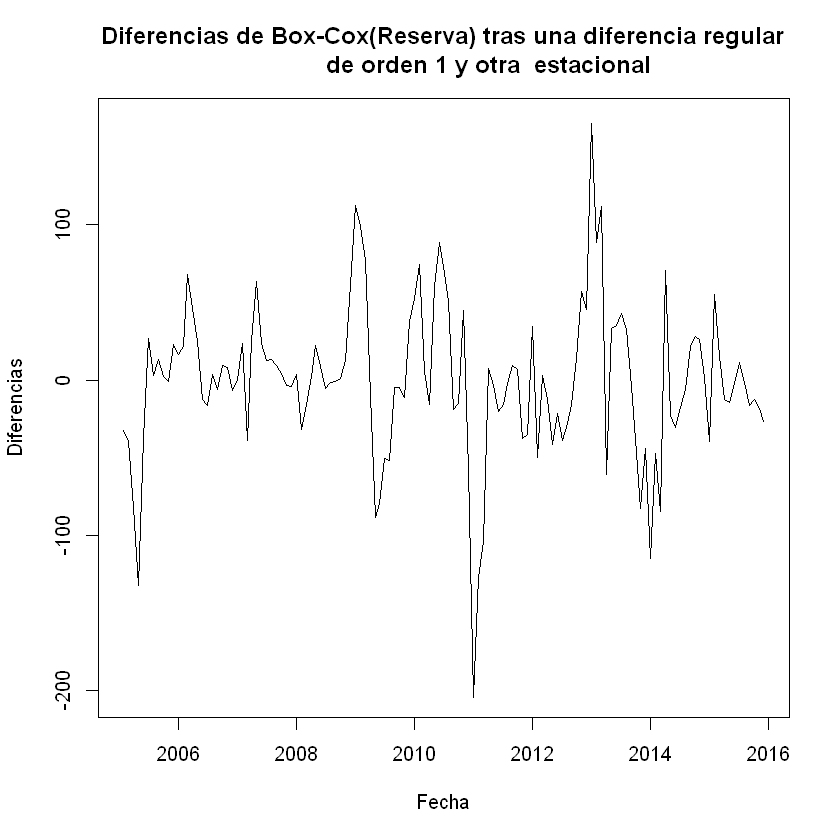

In [35]:
plot(rests.d12,
     main = "Diferencias de Box-Cox(Reserva) tras una diferencia regular
             de orden 1 y otra  estacional",
     xlab = "Fecha",
     ylab = "Diferencias",
     ylim = c(0.99*min(rests.d12), 1.01*max(rests.d12)))

In [38]:
#Probamos el test de raíz unitaria
adf.test(rests.d12)

Warning message in adf.test(rests.d12):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  rests.d12
Dickey-Fuller = -4.7204, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


En este caso la serie si es estacionaria (p-valor < 0.01)

## 3.3 - Estructura ARMA y ARIMA datos de los transformados

Aplicamos el metodo sample extended acf, para ver las mejores opciones para los modelos.

In [39]:
# Estructura del modelo ARMA
library(TSA)

In [40]:
eacf(rests.d12)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x o o o o x x o o x  x  o  o 
1 o x o o o o o o o o o  x  o  o 
2 o x o o o o o o o o o  x  o  o 
3 x o o o o o o o o o o  x  o  o 
4 x o x o o o o o o o o  x  o  o 
5 x x o o o o o o o o o  x  o  o 
6 x x x o x o o o o o o  x  o  o 
7 x x o o o o o o o o o  x  o  o 


El resultado sugiere examinar los modelos MA(2), AR(1), AR(2), ARMA(3,1), ARMA(4,1) o ARMA (5,2). Para ver cual de estos modelos es el más edecuado vamos aplicar el criterio AIC.

In [41]:
fit1 <- arima(rests.d12, order = c(0,0,1))
fit2 <- arima(rests.d12, order = c(1,0,0))
fit3 <- arima(rests.d12, order = c(2,0,1))
fit4 <- arima(rests.d12, order = c(3,0,1))
fit5 <- arima(rests.d12, order = c(4,0,1))
fit6 <- arima(rests.d12, order = c(5,0,2))

c(fit1$aic, fit2$aic, fit3$aic, fit4$aic, fit5$aic, fit6$aic)

[1] 1365.487 1350.470 1353.343 1349.012 1354.775 1348.487

In [42]:
# Probamos con la función auto.arima.
auto.arima(rests.d12)

Series: rests.d12 
ARIMA(1,0,0)(2,0,1)[12] with zero mean 

Coefficients:
         ar1     sar1     sar2     sma1
      0.5926  -0.1246  -0.4263  -0.6683
s.e.  0.0712   0.1209   0.0974   0.1536

sigma^2 estimated as 865.9:  log likelihood=-635.99
AIC=1281.98   AICc=1282.46   BIC=1296.36

Se comprueba que el modelo  AR(1) para diferencias de orden 1 junto con un modelo ARMA(2,1) para la estacionalidad ( lag =12) es el modelo que menor AIC proporciona.

## 3.4 - Diagnóstico del modelo final

Analizamos los residuos para detectar cualquier indicio de no aleatoriedad.

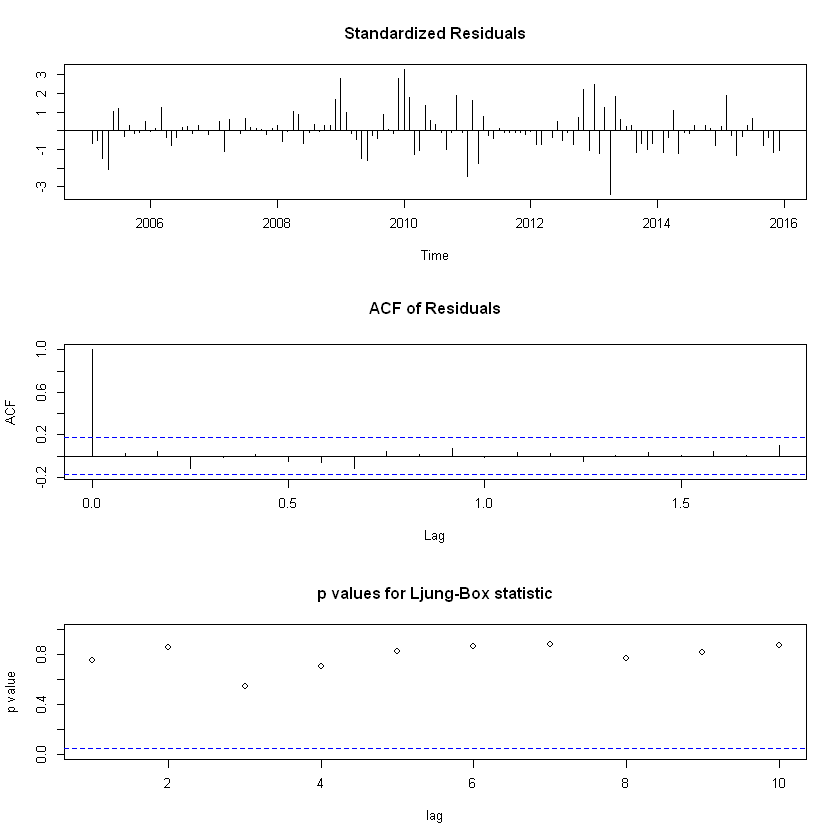

In [43]:
fit <- arima(rests.d12, order=c(1,0,0), seasonal = list(order = c(2, 0, 1), period = 12))
tsdiag(fit)

La función de autocorrelación se mantiene en el intervalo (-0.2,0.2) lo cual indica muy poca correlación entre los residuos. Por otro lado los p-valores del test Box-Ljung (H0: residuos independientes, H1: residuos dependientes), se mantienen con valores superiores a 0.05 por lo que adoptamos la hipótesis nula.

## 3.5 - Predicción de resultados

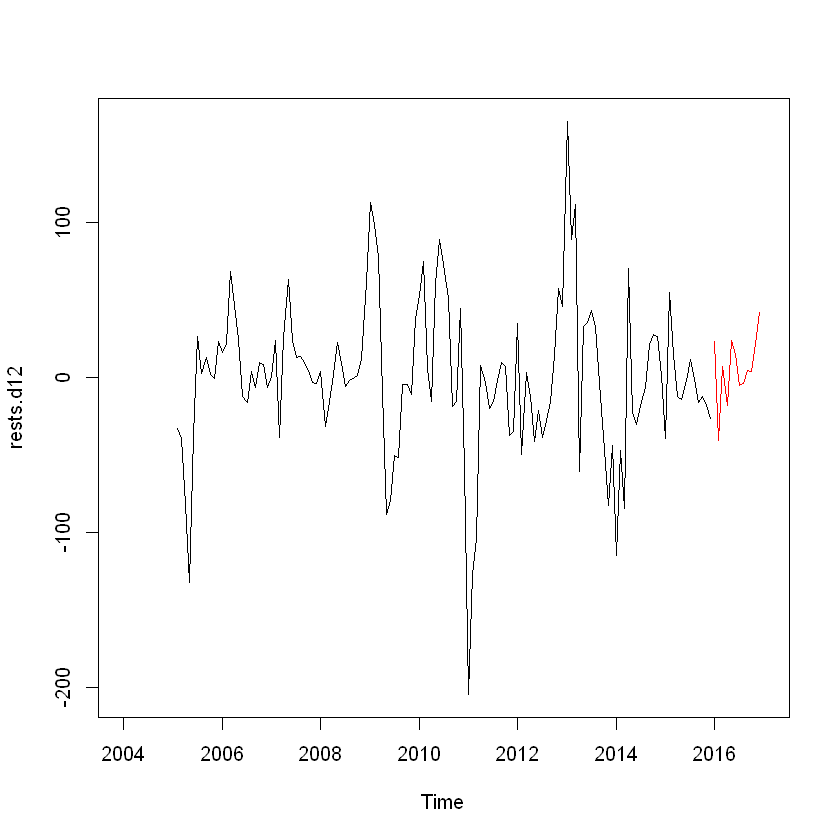

In [44]:
# Prediccíón de la serie de diferencias con el modelo ARIMA seleccionado
plot(rests.d12, xlim = c(2004,2017))
rests.d12_pred <-predict(fit, n.ahead = 12)
lines(rests.d12_pred$pred, col="red")

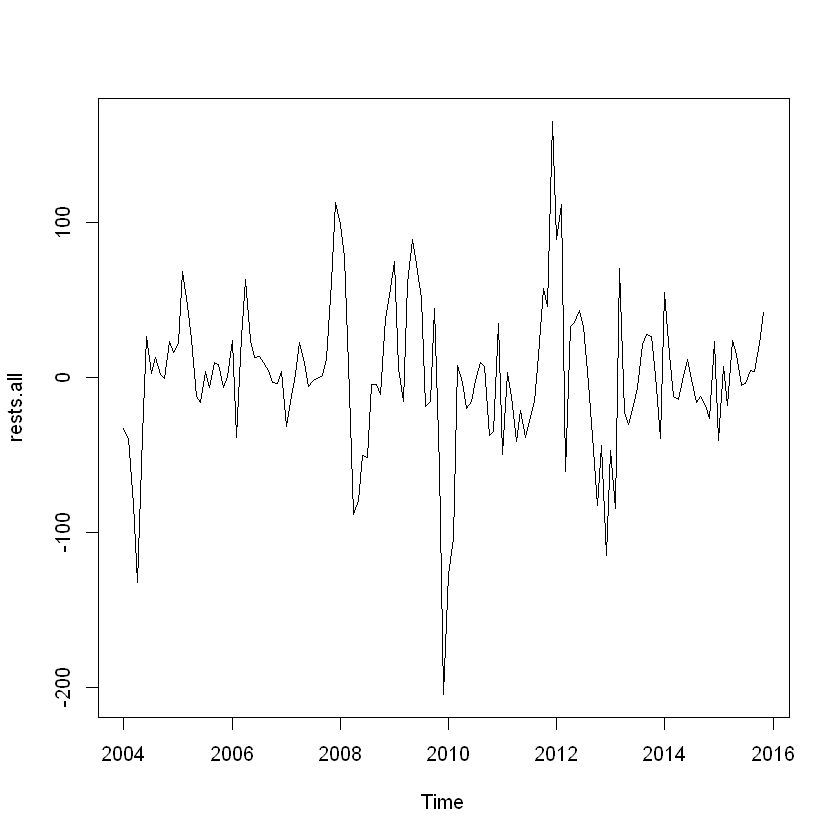

In [45]:
# Combinamos la serie temporal de differencias y la predicción
# en una misma serie

rests.all <- c(rests.d12, rests.d12_pred$pred)
rests.all <- ts(rests.all, start=c(2004,1),freq=12)
plot(rests.all, type="l")

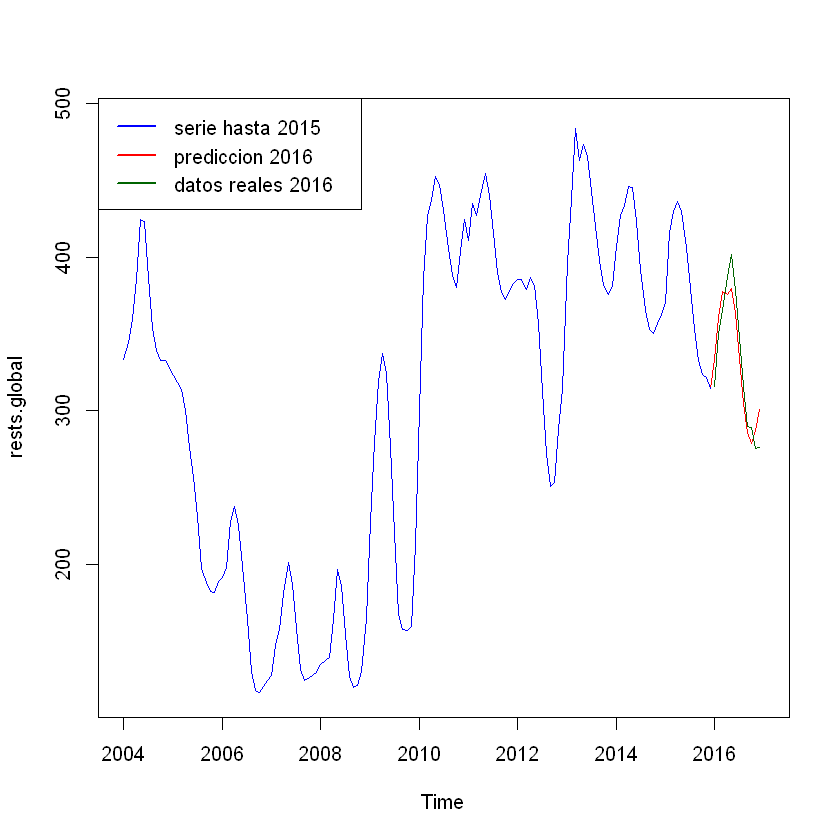

In [46]:
# Invertimos todas las transformaciones

# primero deshacemos la diferencia estacional
rests.inv1 <- diffinv(rests.all, lag = 12, differences = 1,
                     xi = c(rests.d1[1] ,rests.d1[2], rests.d1[3],
                            rests.d1[4], rests.d1[5], rests.d1[6],
                            rests.d1[7], rests.d1[8], rests.d1[9],
                            rests.d1[10], rests.d1[11], rests.d1[12]))

#segundo deshacemos la diferencia de orden 1
rests.inv2 <- diffinv(rests.inv1, lag = 1, differences = 1,
                     xi = rests.BC[1])

#y tercero la transformación Box-Cox
rests.inv3 <- InvBoxCox(rests.inv2,lambda)
rests.global <- ts(rests.inv3, start = 2004, freq = 12)

# hacemos un plot de las serie original con la predicción
plot(rests.global,
     type = "l",
     xlim = c(2004,2017),
     ylim = c(0.99*min(rests.global), 1.01*max(rests.global)),
     col = 'red')
lines(rests, col="blue")
lines(rests.check, col = 'dark green')
legend("topleft",
       legend=c("serie hasta 2015","prediccion 2016",'datos reales 2016'),
       col=c("blue","red",'dark green'),lwd=2)

Series: rests 
ARIMA(1,1,0)(2,1,1)[12] 

Coefficients:
         ar1     sar1     sar2     sma1
      0.6009  -0.1052  -0.4200  -0.6717
s.e.  0.0706   0.1235   0.0986   0.1598

sigma^2 estimated as 204.7:  log likelihood=-541.37
AIC=1092.73   AICc=1093.21   BIC=1107.11

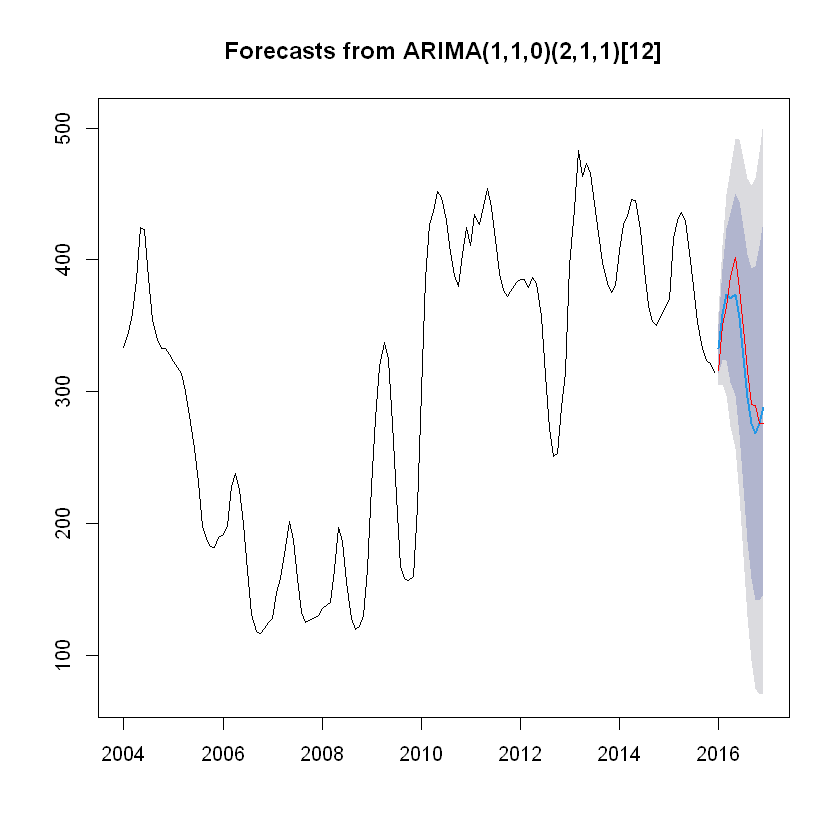

In [48]:
# Con la libreria forecast y la serie original (sin transformar)
ajuste <- auto.arima(rests)
ajuste
rests.fcast <- forecast(ajuste, h=12)
plot(rests.fcast)
lines(rests.check, col = 'red')

Se observa que con forecast la solución es prácticamente indentica, aunque de hecho el AIC obtenido es menor que el modelo obtenido haciendo todo el proceso paso a paso. Aunque para entender el mecanismo y los detalles es necesario hacer el proceso paso. Parece que en principio desde el punto de vista práctico es más recomendable usar forecast. No obstante en la seccion de cálculo de errores se verá cual proporciona mejor resultado

## 3.6 - Calculo de errores

In [49]:
# Errores con el modelo ARIMA paso a paso con transformaciones
(errors_steps <-  data.frame(t(accuracy(window(rests.global,2016), rests.check))))

,Test.set
,<dbl>
ME,0.88926751
RMSE,14.73307242
MAE,13.74344062
MPE,-0.03033209
MAPE,4.17724934
ACF1,0.50850060
Theil's U,0.68817020


In [50]:
# Errores con el modelo ARIMA obtenido a partir de la serie de partida
# y sin transformaciones previas
(errors_forecast <- data.frame(t(accuracy(rests.fcast$mean , rests.check))))

,Test.set
,<dbl>
ME,8.1844328
RMSE,17.3237195
MAE,15.7211855
MPE,2.3004720
MAPE,4.6733293
ACF1,0.5486615
Theil's U,0.7738474


# 4 Evaluación de los modelos

Se presentan en una misma tabla los errores calculados para los tres modelos (suavizado exponencia y los dos modelos ARIMA).

In [51]:
errores <- cbind(errors_steps, errors_forecast, errors)
errores <- errores[, c(4,1,2,3)]
colnames(errores)[2:4] <- c('arima_steps','arima_forecast','suav_exp')
errores

,description,arima_steps,arima_forecast,suav_exp
,<chr>,<dbl>,<dbl>,<dbl>
ME,Error medio,0.88926751,8.1844328,40.247500
RMSE,Raíz del error cuadrático medio,14.73307242,17.3237195,50.157171
MAE,Error medio absoluto,13.74344062,15.7211855,41.899657
MPE,Porcentaje de error medio,-0.03033209,2.3004720,11.503557
MAPE,Porcentaje de error medio absoluto,4.17724934,4.6733293,12.026317
ACF1,Autocorrelación de errores con retraso 1,0.50850060,0.5486615,0.647911
Theil's U,Índice U de desigualdad de Theils,0.68817020,0.7738474,2.195193


Según se muestra en la tabla el modelo ARIMA(1,0,0)(2,0,1){12} proporciona los mejores índices de error de los tres modelos. No obstante se pone de manifiesto que los modelos ARIMA muestran mucha más precisión en que el modelo de suavizado exponencial. 